In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('RELIANCE.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-17,931.173401,938.305786,927.210938,935.383484,915.362793,4430313
1,2018-04-18,936.374084,939.296387,926.269897,929.192200,909.303955,3397094
2,2018-04-19,930.281860,936.126465,926.220337,933.451782,913.472351,4523892
3,2018-04-20,929.192200,933.006042,912.549927,919.187012,899.512878,3381269
4,2018-04-23,921.267334,935.482544,919.781372,927.210938,907.365112,3541772
...,...,...,...,...,...,...,...
1229,2023-04-06,2318.149902,2354.000000,2318.149902,2341.449951,2341.449951,8507771
1230,2023-04-10,2350.000000,2350.399902,2321.550049,2324.850098,2324.850098,5981688
1231,2023-04-11,2334.000000,2341.000000,2324.050049,2336.350098,2336.350098,4865301
1232,2023-04-12,2336.350098,2367.800049,2330.050049,2346.649902,2346.649902,8389646


Text(0, 0.5, 'Close Price, USD($)')

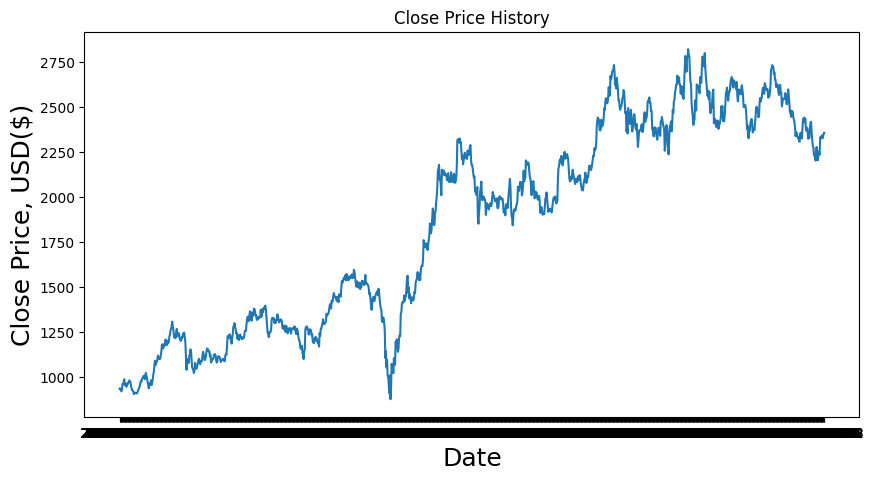

In [9]:
# visualizing:
# the closing price:

plt.figure(figsize = (10,5))
plt.title('Close Price History')
plt.plot(df['Date'],  df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price, USD($)', fontsize=18)

In [13]:
df['Close'].min()

875.748779

In [15]:
df['Close'].max()

2819.850098

In [18]:
df[df['Date'] == df['Close'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [20]:
data = df.filter(['Close'])

In [21]:
# converting it the numpy array:

dataset = data.values

In [49]:
# getting the number of rows to train:

training_data_len = math.ceil(len(dataset)*0.7)

In [50]:
training_data_len

864

In [51]:
# scaling the data:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03067469],
       [0.02749004],
       [0.02968107],
       ...,
       [0.75129897],
       [0.75659695],
       [0.76114923]])

In [52]:
# creating the training dataset: 
train_data = scaled_data[0:training_data_len, :]

# splitting the data into xtrain and ytrain:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.03067469, 0.02749004, 0.02968107, 0.02234361, 0.02647092,
       0.04382099, 0.0440503 , 0.04652159, 0.0571966 , 0.04038157,
       0.04517129, 0.03951532, 0.03561731, 0.04430507, 0.04231783,
       0.04720949, 0.04947697, 0.05360428, 0.05225398, 0.04835597,
       0.0367383 , 0.03123519, 0.02537543, 0.02410154, 0.02175765,
       0.0143692 , 0.01620358, 0.01872583, 0.01852201, 0.01701885,
       0.01633095, 0.01900609, 0.02369391, 0.02894225, 0.03240716,
       0.03584658, 0.04448339, 0.0511075 , 0.05024128, 0.05762969,
       0.06035579, 0.06313281, 0.06631749, 0.06700535, 0.0570692 ,
       0.06889069, 0.07536193, 0.06545124, 0.06134941, 0.04835597,
       0.04168092, 0.03103137, 0.04504392, 0.03900577, 0.04445793,
       0.05403741, 0.04099302, 0.04764258, 0.05760423, 0.07217725])]
[0.07885230749128463]



In [53]:
len(train_data)

864

In [54]:
# converting the xtrain and ytrain into numpy array:

x_train, y_train = np.array(x_train), np.array(y_train)

In [55]:
# reshape the xtrain:
# an LSTM model expects the input in 3d: no. of samples, time stamps, features 

x_train.shape

(804, 60)

In [56]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [57]:
x_train.shape

(804, 60, 1)

In [58]:
#  build the LSTM model:

model = Sequential()

In [59]:
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [60]:
# compiling the model:

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [61]:
# training the model:

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

804/804 [==============================] - 31s 34ms/step - loss: 0.0035


In [62]:
# creating the testing data

test_data = scaled_data[training_data_len - 60: , :]

In [63]:
test_data.shape

(430, 1)

In [64]:
# creating the datasets: x_test and y_test:

x_test = []

# following are the values that we need our model to predict 
y_test = dataset[training_data_len:, :]



In [65]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [66]:
# converting the data to numpy array:

x_test = np.array(x_test)

In [67]:
# reshaping the data:

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [68]:
# getting models predict values:

predictions = model.predict(x_test)

12/12 [==============================] - 1s 27ms/step


In [69]:
# unscaling the data:

predictions = scaler.inverse_transform(predictions)

In [70]:
# evaluating the model using: RMSE 

rmse = np.sqrt(np.mean(((predictions- y_test)**2)))

In [71]:
rmse

143.80426132861015

<ipython-input-72-a710301147e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


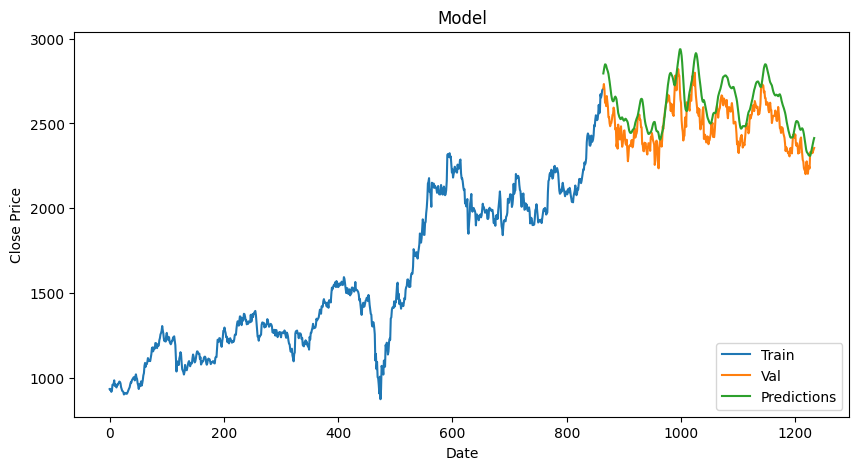

In [72]:
# plotting thr data:

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data:
plt.figure(figsize = (10,5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [73]:
# showing the valid and predicted prices:

valid

,Close,Predictions
864,2707.600098,2794.331299
865,2731.850098,2814.177979
866,2700.399902,2834.054688
867,2622.500000,2847.740967
868,2627.399902,2847.076172
...,...,...
1229,2341.449951,2353.962402
1230,2324.850098,2372.329590
1231,2336.350098,2387.598389
1232,2346.649902,2401.252197
